Here we want to change the values of rainfall to a more realistic measure (within 1mm), play with both the threshold for the rainfall events as well as testing multiple thresholds. Also we want to change several existing variables: month, for instance, should be one-hot encoded instead of label encoded. Time should likely also get some kind of change-- hour could maybe be categorized (morning, day, night or something) and one-hotted as well. <-- pandas get_dummies 

We can also test for differences in means for different thresholds


Other ideas?

# Imports and fixes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling as pdp

In [7]:
data = pd.read_csv('data.csv')
data['sss_change'] = data['sss'].diff().fillna(0)
data.head()

,new_time,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,...,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,set,sst_pct_change,dir_pct_change,spd_pct_change,sss_change
0,2012-09-14 20:30:00.000028800,735126.854167,37.768217,27.886503,3.171527,-70.402566,0.0,0.0,0.0,2012,...,-0.223661,-1.120622,2.145583,0.000000,0.000000,Spurs1,0.000000,0.000000,0.000000,0.000000
1,2012-09-14 21:29:59.999971200,735126.895833,37.767291,27.794171,3.511590,-78.652231,0.0,0.0,0.0,2012,...,-0.285520,-0.968037,2.081695,-0.000025,-0.031722,Spurs1,-1.374910,0.135314,0.293850,-0.000926
2,2012-09-14 22:30:00.000000000,735126.937500,37.767912,27.717789,4.870495,-86.660419,0.0,0.0,0.0,2012,...,-0.345568,-0.358302,2.028844,0.000016,0.022122,Spurs1,-1.141199,0.126846,1.265220,0.000621
3,2012-09-14 23:30:00.000028800,735126.979167,37.768554,27.650786,4.511677,-89.874044,0.0,0.0,0.0,2012,...,-0.369664,-0.519302,1.982482,0.000017,0.022846,Spurs1,-1.003867,0.091158,-0.334265,0.000642
4,2012-09-15 00:29:59.999971200,735127.020833,37.770119,27.593085,4.318494,-94.403915,0.0,0.0,0.0,2012,...,-0.403631,-0.605983,1.942557,0.000041,0.054988,Spurs1,-0.866609,0.098501,-0.227134,0.001566


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9133 entries, 0 to 9132
Data columns (total 24 columns):
new_time          9133 non-null object
time              9133 non-null float64
sss               9133 non-null float64
sst               9133 non-null float64
wind_spd          9133 non-null float64
wind_dir          9133 non-null float64
precip            9133 non-null float64
cum_precip3       9133 non-null float64
cum_precip6       9133 non-null float64
year              9133 non-null int64
month             9133 non-null int64
day               9133 non-null int64
hour              9133 non-null int64
scaled_sss        9133 non-null float64
scaled_dir        9133 non-null float64
scaled_spd        9133 non-null float64
scaled_sst        9133 non-null float64
pct_change        9133 non-null float64
pct_c_scaled      9133 non-null float64
set               9133 non-null object
sst_pct_change    9133 non-null float64
dir_pct_change    9133 non-null float64
spd_pct_change    9133 

In [9]:
data.drop(['scaled_sss','scaled_dir','scaled_spd','scaled_sst','set','spd_pct_change',
          'dir_pct_change','sst_pct_change','pct_change','pct_c_scaled'],axis=1,inplace=True)
data.head()

,new_time,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,sss_change
0,2012-09-14 20:30:00.000028800,735126.854167,37.768217,27.886503,3.171527,-70.402566,0.0,0.0,0.0,2012,9,14,20,0.000000
1,2012-09-14 21:29:59.999971200,735126.895833,37.767291,27.794171,3.511590,-78.652231,0.0,0.0,0.0,2012,9,14,21,-0.000926
2,2012-09-14 22:30:00.000000000,735126.937500,37.767912,27.717789,4.870495,-86.660419,0.0,0.0,0.0,2012,9,14,22,0.000621
3,2012-09-14 23:30:00.000028800,735126.979167,37.768554,27.650786,4.511677,-89.874044,0.0,0.0,0.0,2012,9,14,23,0.000642
4,2012-09-15 00:29:59.999971200,735127.020833,37.770119,27.593085,4.318494,-94.403915,0.0,0.0,0.0,2012,9,15,0,0.001566


In [15]:
data['wind_change'] = data['wind_spd'].diff().fillna(0)
print(data[data['precip'] < 0.01].shape[0])
data.head()

8707


,new_time,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,sss_change,wind_change
0,2012-09-14 20:30:00.000028800,735126.854167,37.768217,27.886503,3.171527,-70.402566,0.0,0.0,0.0,2012,9,14,20,0.000000,0.000000
1,2012-09-14 21:29:59.999971200,735126.895833,37.767291,27.794171,3.511590,-78.652231,0.0,0.0,0.0,2012,9,14,21,-0.000926,0.340064
2,2012-09-14 22:30:00.000000000,735126.937500,37.767912,27.717789,4.870495,-86.660419,0.0,0.0,0.0,2012,9,14,22,0.000621,1.358904
3,2012-09-14 23:30:00.000028800,735126.979167,37.768554,27.650786,4.511677,-89.874044,0.0,0.0,0.0,2012,9,14,23,0.000642,-0.358818
4,2012-09-15 00:29:59.999971200,735127.020833,37.770119,27.593085,4.318494,-94.403915,0.0,0.0,0.0,2012,9,15,0,0.001566,-0.193182


## Fixing Rainfall Measures

In [23]:
data[(data['precip'] <= 0.01)]['precip'].sort_values(ascending=False)

2358    9.990377e-03
2392    9.970689e-03
1912    9.928140e-03
3264    9.118167e-03
6078    7.407094e-03
253     7.363223e-03
1356    6.877891e-03
1402    5.798089e-03
2779    5.418100e-03
3642    2.680809e-03
3091    2.405721e-03
8689    2.228933e-03
746     1.898429e-03
2415    1.929843e-04
1418    1.312367e-12
275     5.196260e-13
1211    2.017362e-13
3141    0.000000e+00
3139    0.000000e+00
3140    0.000000e+00
3143    0.000000e+00
3137    0.000000e+00
3136    0.000000e+00
3135    0.000000e+00
3134    0.000000e+00
3133    0.000000e+00
3142    0.000000e+00
9132    0.000000e+00
3144    0.000000e+00
3145    0.000000e+00
            ...     
6138    0.000000e+00
6139    0.000000e+00
6140    0.000000e+00
6141    0.000000e+00
6142    0.000000e+00
6143    0.000000e+00
6144    0.000000e+00
6145    0.000000e+00
6146    0.000000e+00
6147    0.000000e+00
6148    0.000000e+00
6149    0.000000e+00
6150    0.000000e+00
6153    0.000000e+00
6168    0.000000e+00
6154    0.000000e+00
6155    0.000

In [123]:
data.loc[((data.precip > 0) &  (data.precip < 0.1 )), 'precip'] = 0.1
data.precip = np.round(data.precip,1)
data.precip.sort_values(ascending=False)

2947    35.4
268     31.5
2935    23.4
274     21.8
2496    18.5
1013    18.2
277     17.5
8727    14.1
4303    13.9
1421    13.3
1422    12.8
300     12.4
3334    12.0
2948    11.6
3377    11.6
1657    11.4
8726     9.7
5619     8.8
3339     8.6
1975     8.6
8952     7.6
2959     7.5
3898     6.9
1012     6.6
1974     6.6
3335     6.2
8725     6.1
270      6.0
1571     6.0
3383     5.9
        ... 
6034     0.0
6033     0.0
6032     0.0
6031     0.0
6029     0.0
6055     0.0
6028     0.0
6027     0.0
6026     0.0
6025     0.0
6024     0.0
6023     0.0
6037     0.0
6038     0.0
6039     0.0
6040     0.0
6041     0.0
6042     0.0
6043     0.0
6044     0.0
6045     0.0
6046     0.0
6047     0.0
6048     0.0
6049     0.0
6050     0.0
6052     0.0
6053     0.0
6054     0.0
0        0.0
Name: precip, Length: 9133, dtype: float64

In [124]:
data[(data['precip'] < 0.1)]['precip'].sort_values(ascending=False)

9132    0.0
3152    0.0
3135    0.0
3136    0.0
3137    0.0
3139    0.0
3140    0.0
3141    0.0
3142    0.0
3143    0.0
3144    0.0
3145    0.0
3146    0.0
3149    0.0
3150    0.0
3151    0.0
3153    0.0
3133    0.0
3154    0.0
3155    0.0
3156    0.0
3157    0.0
3158    0.0
3159    0.0
3160    0.0
3161    0.0
3162    0.0
3163    0.0
3164    0.0
3165    0.0
       ... 
6143    0.0
6144    0.0
6145    0.0
6146    0.0
6147    0.0
6148    0.0
6149    0.0
6150    0.0
6151    0.0
6153    0.0
6154    0.0
6155    0.0
6156    0.0
6157    0.0
6158    0.0
6159    0.0
6160    0.0
6161    0.0
6162    0.0
6163    0.0
6164    0.0
6165    0.0
6166    0.0
6167    0.0
6168    0.0
6169    0.0
6170    0.0
6171    0.0
6172    0.0
0       0.0
Name: precip, Length: 8690, dtype: float64

# One hot encoding

In [125]:
new_data = data.copy()
new_data['season'] = new_data['month'].copy()
new_data.loc[((new_data.season <=2 ) |  (new_data.season > 11)), 'season'] = 'Winter'
new_data.loc[(new_data.season ==3), 'season'] = 'Spring'
new_data.loc[(new_data.season ==4), 'season'] = 'Spring'
new_data.loc[(new_data.season ==5), 'season'] = 'Spring'
new_data.loc[(new_data.season ==6), 'season'] = 'Summer'
new_data.loc[(new_data.season ==7), 'season'] = 'Summer'
new_data.loc[(new_data.season ==8), 'season'] = 'Summer'
new_data.loc[(new_data.season ==9), 'season'] = 'Fall'
new_data.loc[(new_data.season ==10), 'season'] = 'Fall'
new_data.loc[(new_data.season ==11), 'season'] = 'Fall'


new_data.loc[((new_data.hour >= 6) & (new_data.hour <12)), 'hour'] = 'Morning'
#new_data.loc[((new_data.hour >=11) & (new_data.hour<=16)), 'hour'] = 'Night'
#new_data.loc[(new_data.hour ), 'season'] = 'Fall'

#new_data.loc[((new_data.season >= 6 ) &  (new_data.season <= 8)), 'season'] = 'Summer'
#new_data.loc[((new_data.season > 8 ) &  (new_data.season <= 11)), 'season'] = 'Fall'

# months = {'1': 'January', '2':'February', '3':'March','4':'April','5': 'May', '6':'June', '7':'July','8':'August',
#          '9': 'September', '10':'October', '11':'November','12':'December',}
# new_data['month'] = new_data['month'].replace(months)
new_data['hour'].replace(12,'Day', inplace=True)
new_data['hour'].replace(13,'Day', inplace=True)
new_data['hour'].replace(14,'Day', inplace=True)
new_data['hour'].replace(15,'Day', inplace=True)
new_data['hour'].replace(16,'Day', inplace=True)
new_data['hour'].replace(17,'Day', inplace=True)
new_data['hour'].replace(18,'Evening', inplace=True)
new_data['hour'].replace(19,'Evening', inplace=True)
new_data['hour'].replace(20,'Evening', inplace=True)
new_data['hour'].replace(21,'Evening', inplace=True)
new_data['hour'].replace(22,'Evening', inplace=True)
new_data['hour'].replace(23,'Evening', inplace=True)
new_data['hour'].replace(0,'Night', inplace=True)
new_data['hour'].replace(1,'Night', inplace=True)
new_data['hour'].replace(2,'Night', inplace=True)
new_data['hour'].replace(3,'Night', inplace=True)
new_data['hour'].replace(4,'Night', inplace=True)
new_data['hour'].replace(5,'Night', inplace=True)

print(new_data.hour.unique())
new_data['season'].unique()

['Evening' 'Night' 'Morning' 'Day']


array(['Fall', 'Winter', 'Spring', 'Summer'], dtype=object)

In [126]:
new_data.hour.max()

'Night'

In [127]:
new_data.head()

,new_time,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,sss_change,wind_change,season
0,2012-09-14 20:30:00.000028800,735126.854167,37.768217,27.886503,3.171527,-70.402566,0.0,0.0,0.0,2012,9,14,Evening,0.000000,0.000000,Fall
1,2012-09-14 21:29:59.999971200,735126.895833,37.767291,27.794171,3.511590,-78.652231,0.0,0.0,0.0,2012,9,14,Evening,-0.000926,0.340064,Fall
2,2012-09-14 22:30:00.000000000,735126.937500,37.767912,27.717789,4.870495,-86.660419,0.0,0.0,0.0,2012,9,14,Evening,0.000621,1.358904,Fall
3,2012-09-14 23:30:00.000028800,735126.979167,37.768554,27.650786,4.511677,-89.874044,0.0,0.0,0.0,2012,9,14,Evening,0.000642,-0.358818,Fall
4,2012-09-15 00:29:59.999971200,735127.020833,37.770119,27.593085,4.318494,-94.403915,0.0,0.0,0.0,2012,9,15,Night,0.001566,-0.193182,Fall


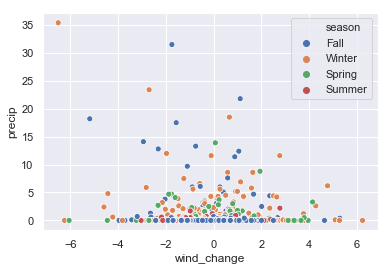

In [128]:
sns.set()
sns.scatterplot(x='wind_change', y='precip',data=new_data, hue='season')

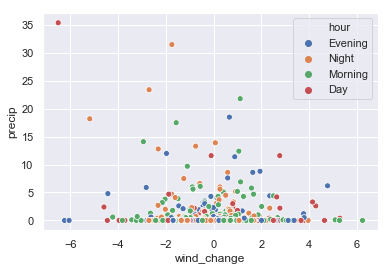

In [129]:
sns.scatterplot(x='wind_change', y='precip',data=new_data, hue='hour')

In [130]:
columns = ['season','hour']
new_enc = pd.get_dummies(new_data, columns=columns, drop_first=False)
new_enc.head()

,new_time,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,...,sss_change,wind_change,season_Fall,season_Spring,season_Summer,season_Winter,hour_Day,hour_Evening,hour_Morning,hour_Night
0,2012-09-14 20:30:00.000028800,735126.854167,37.768217,27.886503,3.171527,-70.402566,0.0,0.0,0.0,2012,...,0.000000,0.000000,1,0,0,0,0,1,0,0
1,2012-09-14 21:29:59.999971200,735126.895833,37.767291,27.794171,3.511590,-78.652231,0.0,0.0,0.0,2012,...,-0.000926,0.340064,1,0,0,0,0,1,0,0
2,2012-09-14 22:30:00.000000000,735126.937500,37.767912,27.717789,4.870495,-86.660419,0.0,0.0,0.0,2012,...,0.000621,1.358904,1,0,0,0,0,1,0,0
3,2012-09-14 23:30:00.000028800,735126.979167,37.768554,27.650786,4.511677,-89.874044,0.0,0.0,0.0,2012,...,0.000642,-0.358818,1,0,0,0,0,1,0,0
4,2012-09-15 00:29:59.999971200,735127.020833,37.770119,27.593085,4.318494,-94.403915,0.0,0.0,0.0,2012,...,0.001566,-0.193182,1,0,0,0,0,0,0,1


# Thresholds

In [131]:
rain = new_enc[new_enc['precip'] >0]['precip']
print(rain.median())
rain.mean()

0.4


1.6176072234762977

So from the start, pretty weird that for rain values > 0, only 8% of values are in the summer but 43.34% are in the winter? 

In [132]:
ordered_rain = rain.sort_values(ascending=True)
new_sum = np.array(ordered_rain).cumsum()
scaled_sum = new_sum/new_sum.max()
first = len(scaled_sum[scaled_sum >= 0.5])
second = len(scaled_sum[scaled_sum >= 0.33])
#new_sum[-11:]
print(len(ordered_rain))
print(first)
print(second)
ordered_rain[-first:]


443
27
52


8725     6.1
3335     6.2
1974     6.6
1012     6.6
3898     6.9
2959     7.5
8952     7.6
3339     8.6
1975     8.6
5619     8.8
8726     9.7
1657    11.4
3377    11.6
2948    11.6
3334    12.0
300     12.4
1422    12.8
1421    13.3
4303    13.9
8727    14.1
277     17.5
1013    18.2
2496    18.5
274     21.8
2935    23.4
268     31.5
2947    35.4
Name: precip, dtype: float64

In [173]:
low_thres = new_enc[new_enc['precip'] < 3.766850]
thres = new_enc[new_enc['precip'] >= 3.766850]
threshold = [3 if i >= 6.130606 else 2 if i >=3.766850 else 1 if i>0 else 0 for i in new_enc['precip']]
new_enc['thres'] = threshold
print(low_thres[['sss_change','sss','sst','wind_spd']].agg(['mean','median']))
print(thres[['sss_change','sss','sst','wind_spd']].agg(['mean','median']))

        sss_change        sss        sst  wind_spd
mean      0.000653  37.453298  24.787120  5.669648
median    0.000167  37.443424  24.409049  5.821573
        sss_change        sss        sst  wind_spd
mean     -0.118638  37.290929  24.532075  5.562377
median   -0.047402  37.356062  23.937423  5.816297


In [174]:
new_enc['thres'].unique()

array([0, 1, 2, 3], dtype=int64)

In [175]:
## So group 0 is below the threshold, group 1 is at or above
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
#Would need to merge things 
mc = MultiComparison(new_enc['sss'], new_enc['thres'])
result = mc.tukeyhsd()

mc1 = MultiComparison(new_enc['sss_change'], new_enc['thres'])
result1 = mc1.tukeyhsd()

mc2 = MultiComparison(new_enc['wind_spd'], new_enc['thres'])
result2 = mc2.tukeyhsd()

mc3 = MultiComparison(new_enc['wind_change'], new_enc['thres'])
result3 = mc3.tukeyhsd()

mc4 = MultiComparison(new_enc['sst'], new_enc['thres'])
result4 = mc4.tukeyhsd()

mc5 = MultiComparison(new_enc['wind_dir'], new_enc['thres'])
result5 = mc5.tukeyhsd()
 
print(result)
print('For Salinity', mc.groupsunique,'\n\n')

print(result1)
print('For Salinity Change', mc1.groupsunique,'\n\n')

print(result2)
print('For Wind Speed', mc2.groupsunique,'\n\n')

print(result3)
print('For Wind Change',mc3.groupsunique,'\n\n')

print(result4)
print('For Temperature',mc4.groupsunique,'\n\n')

print(result5)
print('For Wind Direction',mc5.groupsunique,'\n\n')

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     0.0066  -0.0081  0.0212 False 
  0      2    -0.0862  -0.1418 -0.0306  True 
  0      3     -0.238  -0.2936 -0.1824  True 
  1      2    -0.0927  -0.1501 -0.0354  True 
  1      3    -0.2446  -0.3019 -0.1872  True 
  2      3    -0.1518  -0.2304 -0.0733  True 
---------------------------------------------
For Salinity [0 1 2 3] 


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     -0.003  -0.0064  0.0004 False 
  0      2    -0.0179  -0.0308 -0.0049  True 
  0      3     -0.221  -0.2339  -0.208  True 
  1      2    -0.0149  -0.0283 -0.0015  True 
  1      3     -0.218  -0.2314 -0.2046  True 
  2      3    -0.2031  -0.2214 -0.1848  True 
---------------------------------------------
For Salinity Change [0 1 2 3] 


Multiple Co

So using multiple groups (group 0 as everything below a 33% rainfall value threshold, group 1 as the 33%-50%, and group 2 as the 50% and above values) we can see that there are significant differences in mean values for several fields and several thresholds

In [176]:
new_enc[new_enc['thres'] == 0][['sss','sst','wind_change','sss_change']].median()

sss            37.443204
sst            24.415689
wind_change    -0.015733
sss_change      0.000201
dtype: float64

In [177]:
new_enc[new_enc['thres'] == 1][['sss','sst','wind_change','sss_change']].median()

sss            37.445424
sst            24.192813
wind_change    -0.006983
sss_change     -0.001132
dtype: float64

In [178]:
new_enc[new_enc['thres'] == 2][['sss','sst','wind_change','sss_change']].median()

sss            37.359551
sst            23.477116
wind_change     0.225310
sss_change     -0.022254
dtype: float64

In [179]:
new_enc[new_enc['thres'] == 3][['sss','sst','wind_change','sss_change']].median()

sss            37.327668
sst            24.384788
wind_change    -0.339796
sss_change     -0.104618
dtype: float64

# Models

In [180]:
new_enc.columns

Index(['new_time', 'time', 'sss', 'sst', 'wind_spd', 'wind_dir', 'precip',
       'cum_precip3', 'cum_precip6', 'year', 'month', 'day', 'sss_change',
       'wind_change', 'season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter', 'hour_Day', 'hour_Evening', 'hour_Morning',
       'hour_Night', 'thres'],
      dtype='object')

In [181]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
X = new_enc.drop(['cum_precip3','cum_precip6','thres','time','new_time',
                 'wind_dir','precip'],axis=1)
y=new_enc['thres']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [183]:
import warnings 
warnings.filterwarnings('ignore')
log = LogisticRegression()
rb = RobustScaler()
steps = [('scaler',rb), ('log', log)]
pipe = Pipeline(steps)
parameters = {'log__C': [1, 10, 50, 100], 'log__multi_class': ['multinomial','auto'],
               'log__solver': ['lbfgs','sag','saga','newton-cg'], 'log__max_iter': [100, 200,500],}

grid = GridSearchCV(pipe, param_grid=parameters, cv=5)

grid.fit(X_train, y_train)
print("score = %3.4f" %(grid.score(X_test,y_test)))
print(grid.best_params_)

from sklearn.metrics import confusion_matrix
pred = grid.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, pred))

score = 0.9540
{'log__C': 10, 'log__max_iter': 100, 'log__multi_class': 'multinomial', 'log__solver': 'newton-cg'}
[[3047    0    0    0]
 [ 134    0    0    1]
 [   8    0    0    0]
 [   4    0    0    3]]


In [184]:
steps1 = [('scaler', RobustScaler()), ('forest',  RandomForestClassifier(random_state=42))] 

pipeline1 = Pipeline(steps1)

parameters1 = {'forest__n_estimators':[200,500,1000], 'forest__min_samples_split':[2,3,4],
               'forest__criterion':['gini','entropy'],'forest__max_depth':[2,3,4,None]} 
    
grid1 = GridSearchCV(pipeline1, param_grid=parameters1, cv=5)

grid1.fit(X_train, y_train)
print("score = %3.2f" %(grid1.score(X_test,y_test)))
print(grid1.best_params_)
pred1 = grid1.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, pred1))

score = 0.95
{'forest__criterion': 'gini', 'forest__max_depth': None, 'forest__min_samples_split': 2, 'forest__n_estimators': 1000}
[[3039    8    0    0]
 [ 128    6    0    1]
 [   6    2    0    0]
 [   2    2    0    3]]


In [185]:
new_enc['thres'].value_counts()

0    8690
1     391
3      26
2      26
Name: thres, dtype: int64

In [172]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

steps1 = [('scaler', RobustScaler()), ('forest',  XGBClassifier(random_state=42, tree_method='hist',))] 

pipeline1 = Pipeline(steps1)

parameters1 = {'forest__n_estimators':[200,500,1000], 'forest__min_samples_split':[2,3,4],
               'forest__booster':['gbtree','dart'],'forest__grow_policy':['lossguide','depthwise'],
              'forest__max_bin':[128,256]} 
    
grid1 = GridSearchCV(pipeline1, param_grid=parameters1, cv=5)

grid1.fit(X_train, y_train)
print("score = %3.4f" %(grid1.score(X_test,y_test)))
print(grid1.best_params_)
pred1 = grid1.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, pred1))

[12:28:58] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:29:01] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:29:03] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:29:05] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:29:08] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:29:10] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:29:16] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:29:21] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:29:27] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:29:31] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:29:37] Tree meth

[12:36:38] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:36:44] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:36:54] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:37:05] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:37:15] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:37:24] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:37:35] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:37:37] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:37:39] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:37:42] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:37:44] Tree meth

[12:45:00] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:45:02] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:45:05] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:45:10] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:45:16] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:45:22] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:45:28] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:45:34] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:45:44] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:45:54] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:46:04] Tree meth

[22:13:59] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[22:16:30] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[22:19:19] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[22:22:16] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[22:22:22] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[22:22:27] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[22:22:33] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[22:22:39] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[22:22:45] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[22:23:31] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[22:24:13] Tree meth

[09:14:14] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[09:14:54] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[09:15:35] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[09:16:17] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[09:16:59] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[09:19:32] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[09:22:02] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[09:24:34] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[09:27:14] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[09:29:59] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[09:30:06] Tree meth

In [186]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist',booster='gbtree',n_estimators=1000, grow_policy='lossguide')

# steps1 = [('scaler', RobustScaler()), ('forest',  XGBClassifier(random_state=42, tree_method='hist',))] 

# pipeline1 = Pipeline(steps1)

# parameters1 = {'forest__n_estimators':[200,500,1000], 'forest__min_samples_split':[2,3,4],
#                'forest__criterion':['gini','entropy'],'forest__max_depth':[2,3,4]} 
    
#grid1 = GridSearchCV(pipeline1, param_grid=parameters1, cv=5)

xgb.fit(X_train, y_train)
print("score = %3.5f" %(xgb.score(X_test,y_test)))
pred1 = xgb.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(classification_report(y_test, pred1))

[08:36:29] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
score = 0.94870
[[3016   29    1    1]
 [ 117   15    2    1]
 [   4    3    0    1]
 [   1    2    2    2]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3047
           1       0.31      0.11      0.16       135
           2       0.00      0.00      0.00         8
           3       0.40      0.29      0.33         7

   micro avg       0.95      0.95      0.95      3197
   macro avg       0.42      0.35      0.37      3197
weighted avg       0.93      0.95      0.94      3197



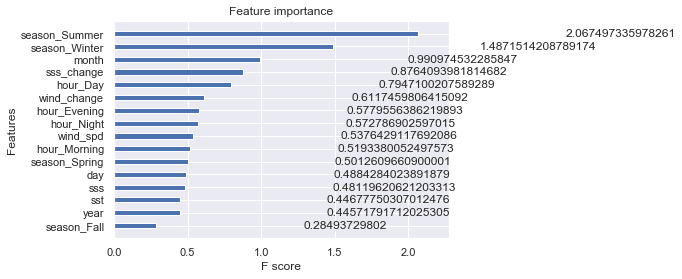

In [187]:
import xgboost
xgboost.plot_importance(xgb, importance_type='gain', height=0.4)

In [188]:
from sklearn.decomposition import PCA
pca = PCA(.97)
pca.fit(X)
csum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(csum>=.97)+1
d

3

In [189]:
from sklearn.feature_selection import RFE

model = RandomForestClassifier()

rfe = RFE(xgb, 7)
rfe = rfe.fit(X, y)

print(rfe.support_)
print(rfe.ranking_)
print(X.head(0))

[08:40:57] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[08:41:21] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[08:41:47] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[08:42:11] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[08:42:35] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[08:42:58] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[08:43:20] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[08:43:41] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[08:44:00] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[08:44:19] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[ True  True  True F

In [190]:
X1 = X.drop(['year','season_Fall','season_Spring','season_Summer','season_Winter',
           'hour_Day','hour_Evening','hour_Morning','hour_Night'],axis=1)
X1.head()

,sss,sst,wind_spd,month,day,sss_change,wind_change
0,37.768217,27.886503,3.171527,9,14,0.000000,0.000000
1,37.767291,27.794171,3.511590,9,14,-0.000926,0.340064
2,37.767912,27.717789,4.870495,9,14,0.000621,1.358904
3,37.768554,27.650786,4.511677,9,14,0.000642,-0.358818
4,37.770119,27.593085,4.318494,9,15,0.001566,-0.193182


In [193]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500).fit(X_train, y_train)

perm = PermutationImportance(rf, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0016 ± 0.0013,sss_change
-0.0000 ± 0.0006,hour_Night
-0.0000 ± 0.0008,season_Winter
-0.0001 ± 0.0008,month
-0.0002 ± 0.0006,hour_Morning
-0.0003 ± 0.0005,season_Fall
-0.0003 ± 0.0000,hour_Evening
-0.0003 ± 0.0008,season_Summer
-0.0003 ± 0.0006,season_Spring
-0.0004 ± 0.0006,sss


In [199]:
X_weird = X[['sss_change','hour_Night']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_weird, y, test_size=0.3, random_state=42)
xgb.fit(X_train1, y_train1)
print("score = %3.5f" %(xgb.score(X_test1,y_test1)))
pred1 = xgb.predict(X_test1)
print(confusion_matrix(y_test1, pred1))
print(classification_report(y_test1, pred1))

[08:56:46] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
score = 0.95511
[[2613    0    0    1]
 [ 114    0    0    0]
 [   5    0    0    0]
 [   3    0    0    4]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2614
           1       0.00      0.00      0.00       114
           2       0.00      0.00      0.00         5
           3       0.80      0.57      0.67         7

   micro avg       0.96      0.96      0.96      2740
   macro avg       0.44      0.39      0.41      2740
weighted avg       0.91      0.96      0.93      2740



In [217]:
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    "num_class" : 4,
    'objective': 'multiclass',
    'metric': {'multi_error', 'multi_logloss'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                early_stopping_rounds=50)


print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test,y_pred))

Starting training...
[1]	valid_0's multi_logloss: 0.197523	valid_0's multi_error: 0.046919
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's multi_logloss: 0.193485	valid_0's multi_error: 0.046919
[3]	valid_0's multi_logloss: 0.190829	valid_0's multi_error: 0.046919
[4]	valid_0's multi_logloss: 0.188499	valid_0's multi_error: 0.046919
[5]	valid_0's multi_logloss: 0.186818	valid_0's multi_error: 0.046919
[6]	valid_0's multi_logloss: 0.185132	valid_0's multi_error: 0.046919
[7]	valid_0's multi_logloss: 0.183515	valid_0's multi_error: 0.046919
[8]	valid_0's multi_logloss: 0.182085	valid_0's multi_error: 0.046919
[9]	valid_0's multi_logloss: 0.18094	valid_0's multi_error: 0.046919
[10]	valid_0's multi_logloss: 0.179806	valid_0's multi_error: 0.0466062
[11]	valid_0's multi_logloss: 0.178564	valid_0's multi_error: 0.0466062
[12]	valid_0's multi_logloss: 0.177849	valid_0's multi_error: 0.0466062
[13]	valid_0's multi_logloss: 0.176583	valid_0's multi_error: 0.0466062


In [218]:
print(confusion_matrix(y_test, y_pred.argmax(axis=1)))

[[3043    3    0    1]
 [ 127    5    2    1]
 [   5    1    1    1]
 [   3    1    1    2]]
